In [3]:
import pandas as pd

from functions.utils import *

df = pd.read_pickle("inst.dat")

In [2]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/instquality/")

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/instquality/")

In [6]:
prefixes = ["efw", "fiw", "ief", "p5d", "pts", "wgi", "wb", "tgt"]
col_counts = {p: sum(c.startswith(p + "_") and not c.endswith("_f") for c in df.columns)
              for p in prefixes}

print("Number of variables per source:")
print(pd.Series(col_counts).astype(int).to_string())

Number of variables per source:
efw    79
fiw    15
ief    13
p5d    17
pts     6
wgi    36
wb     48
tgt     2


In [7]:
prefix = 'fiw'
cols = [c for c in df.columns if c.startswith(f"{prefix}_") and not c.endswith("_f_f")]
print(f"Found {len(cols)} {prefix} columns:")
print("\n".join(cols))

Found 31 fiw columns:
fiw_c_t
fiw_status
fiw_pr_rating
fiw_cl_rating
fiw_a
fiw_b
fiw_c
fiw_add_q
fiw_add_a
fiw_pr
fiw_d
fiw_e
fiw_f
fiw_g
fiw_cl
fiw_total
fiw_c_t_f
fiw_status_f
fiw_pr_rating_f
fiw_cl_rating_f
fiw_a_f
fiw_b_f
fiw_c_f
fiw_add_q_f
fiw_add_a_f
fiw_pr_f
fiw_d_f
fiw_e_f
fiw_g_f
fiw_cl_f
fiw_total_f


In [8]:
from functions.utils import revert_to_raw

df = revert_to_raw(df) # no _f or nulls_ columns

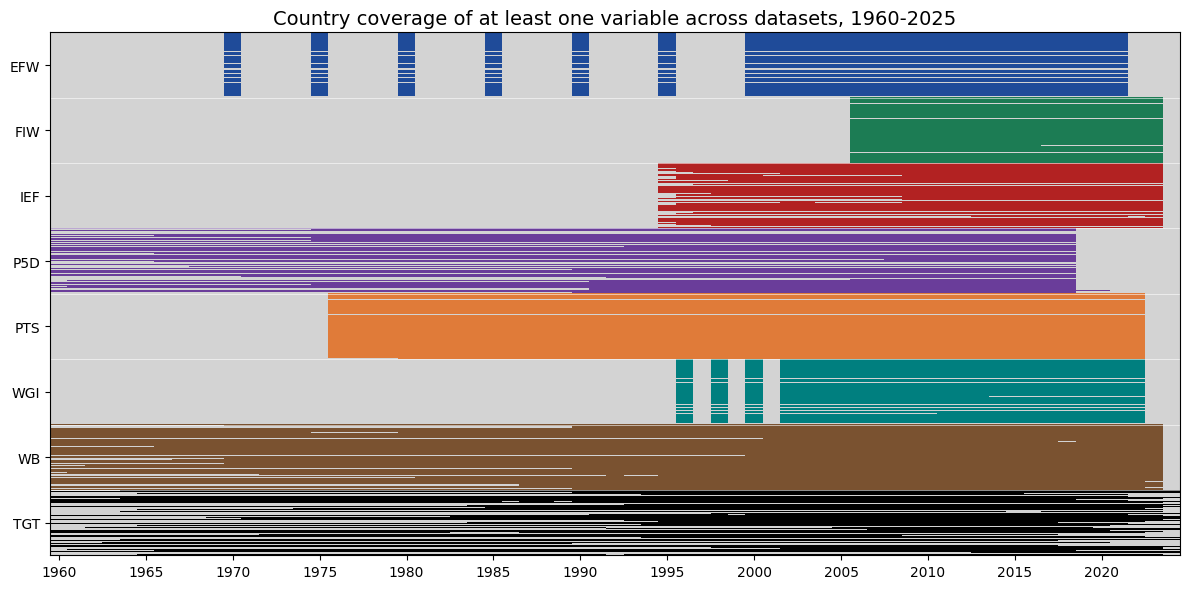

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Country coverage of at least one variable across datasets, 1960-2025'}>)

In [9]:
from functions.plot import coverage_panel

prefixes = ["efw", "fiw", "ief", "p5d", "pts", "wgi", "wb", "tgt"]
coverage_panel(df, prefixes, start=1960, end=2024)

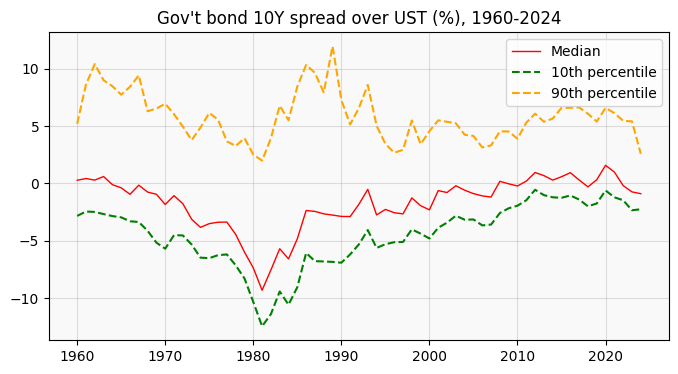

In [4]:
from functions.plot import target_timeseries

target_timeseries(df, 'spread', 0.1, 0.9)

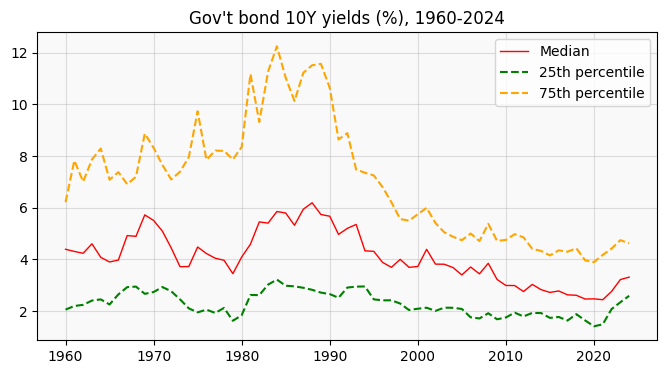

In [5]:
target_timeseries(df, 'yield', 0.25, 0.75)

In [14]:
# countries with no tgt_yield observations at all
check_countries = (
    df.groupby("country")["tgt_yield"]
      .apply(lambda s: s.notna().sum())
      # .apply(lambda s: s.isna().sum())
      .loc[lambda x: x == 0]
      .index.tolist()
)

print("Countries with (no) tgt_yield observations:")
print(check_countries)

Countries with (no) tgt_yield observations:
['Andorra', 'Benin', 'Bermuda', 'Burkina Faso', 'Cuba', 'Curacao', 'Cyprus', "Côte d'Ivoire", 'Faroe Islands', 'French Guiana', 'French Polynesia', 'Germany East', 'Gibraltar', 'Guinea-Bissau', 'Liechtenstein', 'Mali', 'Malta', 'Martinique', 'Monaco', 'Nauru', 'Niger', 'North Korea', 'Puerto Rico', 'Reunion', 'San Marino', 'Senegal', 'Serbia and Montenegro', 'Soviet Union', 'Taiwan', 'Togo', 'Turkmenistan', 'Western Sahara', 'Yugoslavia']


/tmp/ipython-input-3031180150.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


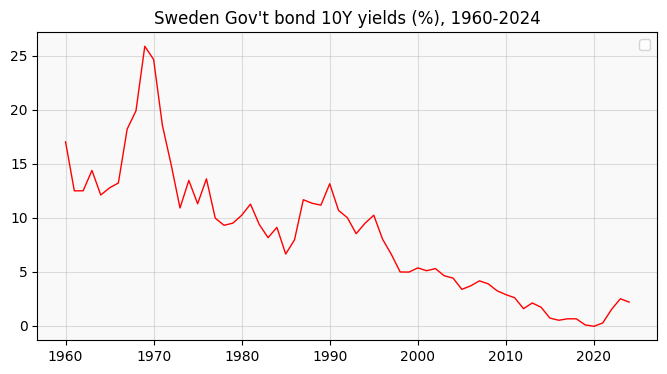

In [17]:
# plot
import matplotlib.pyplot as plt

country = 'Sweden'
us = df[df.country==f'{country}']
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax.plot(us['year'], us['tgt_yield'], lw=1, color='red')

ax.set_title(f"{country} Gov't bond 10Y yields (%), 1960-2024")
ax.legend()
ax.grid(which="both", axis="both", linestyle="-", alpha=0.4)
ax.set_facecolor("#f9f9f9")
plt.show()